# Tests library module

In [1]:
import math
import pandas as pd
import numpy as np
from importlib import reload
from fuzzywuzzy import process, fuzz

# import matplotlib pyplot commands
from matplotlib.pyplot import *
 
# Show Plots in the Notebook
%matplotlib inline
 
rcParams['figure.figsize']= (10, 8)   # set Chart Size
rcParams['font.size'] = 14            # set Font size in Chart

# 'style' the plot like fivethirtyeight.com website
style.use('bmh')


C:\Users\Alan\Anaconda2\envs\py36\lib\site-packages\fuzzywuzzy\fuzz.py:35: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [3]:
import heatpump.library as library

In [117]:
reload(library)

<module 'library' from 'C:\\Users\\Alan\\Documents\\GitHub\\heat-pump-calc\\library.py'>

In [4]:
library.cities()[:5]

[('Adak', 2), ('Akhiok', 283), ('Akiachak', 84), ('Akiak', 85), ('Akutan', 3)]

In [5]:
library.city_from_id(1)

Name                                                         Anchorage
Latitude                                                         61.15
Longitude                                                      -149.86
ERHRegionID                                                          2
WAPRegionID                                                          2
FuelRefer                                                            0
FuelCityID                                                         NaN
Oil1Price                                                         3.07
Oil2Price                                                          NaN
PropanePrice                                                       4.5
BirchPrice                                                         325
SprucePrice                                                        345
CoalPrice                                                          175
SteamPrice                                                         NaN
HotWat

In [6]:
library.miscellaneous_info()

ID                                                                      1
LibVersion                                              2/27/2018 0:00:00
DiscountRate                                                         0.03
RegSurcharge                                                       0.0032
RegSurchargeElectric                                               0.0009
PCEkWhLimit                                                           500
PCEFundingPct                                                           1
MiscNotes               Inflation factors and discount rate from 2011 ...
Name: 0, dtype: object

In [7]:
library.util_from_id(1)

ID                                                              1
Name                                Chugach Electric- Residential
Active                                                          1
Type                                                            1
IsCommercial                                                    0
ChargesRCC                                                      1
PCE                                                             0
CO2                                                           1.1
CustomerChg                                                     8
DemandCharge                                                  NaN
NameShort                                                  Chugac
Blocks          [(nan, 0.17713), (nan, nan), (nan, nan), (nan,...
Name: 1, dtype: object

In [8]:
print(library.util_from_id(1).Blocks)
print(library.util_from_id(383).Blocks)

[(nan, 0.17713), (nan, nan), (nan, nan), (nan, nan), (nan, nan)]
[(100.0, 0.8109000000000001), (400.0, 0.7409000000000001), (500.0, 0.6609), (1000.0, 0.5909), (nan, 0.5609000000000001)]


In [9]:
library.fuels()

[('Natural Gas', 1),
 ('Propane', 2),
 ('#1 Oil', 3),
 ('#2 Oil', 4),
 ('Birch Wood', 5),
 ('Spruce Wood', 6),
 ('Coal', 7),
 ('District Heat, Steam', 8),
 ('District Heat, Hot Water', 9)]

In [10]:
library.fuel_from_id(6)

desc         Spruce Wood
unit                cord
btus            1.81e+07
co2                    0
effic               0.63
price_col    SprucePrice
Name: 6, dtype: object

In [11]:
library.fuel_price(6, 1)

345.0

In [12]:
library.tmy_from_id(702190).head()

,db_temp,rh,wind_spd,month
2018-01-01 00:30:00,35.06,92,36.909510,1
2018-01-01 01:30:00,35.06,92,38.027980,1
2018-01-01 02:30:00,35.06,92,36.909510,1
2018-01-01 03:30:00,35.96,85,39.146450,1
2018-01-01 04:30:00,35.96,85,35.567346,1


In [14]:
import heatpump.elec_cost as elec_cost
reload(elec_cost)

<module 'heatpump.elec_cost' from 'C:\\Users\\Alan\\Documents\\GitHub\\heat-pump-calc\\heatpump\\elec_cost.py'>

In [15]:
util_id = 383
#util_id = 1
ec = elec_cost.ElecCostCalc(util_id)
print(ec.utility)
print(ec.utility.Blocks)
print(ec.final_blocks())
ec = elec_cost.ElecCostCalc(util_id, pce=0.1)
print(ec.final_blocks())
ec = elec_cost.ElecCostCalc(util_id, pce=0.1, sales_tax=1.)
print(ec.final_blocks())
ec = elec_cost.ElecCostCalc(util_id, pce=0.1, pce_limit=200)
print(ec.final_blocks())
ec = elec_cost.ElecCostCalc(util_id, pce=0.1, pce_limit=math.nan)
print(ec.final_blocks())
ec = elec_cost.ElecCostCalc(util_id, pce=0.1, pce_limit=0)
print(ec.final_blocks())
ec = elec_cost.ElecCostCalc(util_id, blocks=[(400, 0.22), (math.nan, 0.18)], pce=0.1, pce_limit=200, sales_tax=0.1)
print(ec.final_blocks())

ID                                                            383
Name                  Gwitchyaa Zhee Utility Co - Commercial - Sm
Active                                                          1
Type                                                            1
IsCommercial                                                    1
ChargesRCC                                                      1
PCE                                                          0.37
CO2                                                             2
CustomerChg                                                     0
DemandCharge                                                  NaN
NameShort                                                  Gwitch
Blocks          [(100.0, 0.8109000000000001), (400.0, 0.740900...
Name: 383, dtype: object
[(100.0, 0.8109000000000001), (400.0, 0.7409000000000001), (500.0, 0.6609), (1000.0, 0.5909), (nan, 0.5609000000000001)]
[(100.0, 0.44090000000000007), (300.0, 0.3709000000000001), (1

In [16]:
util_id = 480  # ML&P Large Commercial
ec = elec_cost.ElecCostCalc(util_id)
print(ec.demand_charge, ec.customer_charge)
ec = elec_cost.ElecCostCalc(util_id, sales_tax=0.1)
print(ec.demand_charge, ec.customer_charge)
ec = elec_cost.ElecCostCalc(util_id, sales_tax=0.1, demand_charge=10., customer_charge=5.)
print(ec.demand_charge, ec.customer_charge)

23.29 44.15
25.619 48.565000000000005
11.0 5.5


In [17]:
library.city_from_id(1).ElecUtilities

[('Anchorage ML&P - Residential', 2),
 ('Anchorage ML&P - Commercial - Sm', 293),
 ('Anchorage ML&P - Commercial - Lg', 480),
 ('Chugach Electric- Residential', 1),
 ('Chugach Electric - Commercial - Sm', 361),
 ('Chugach Electric - Commercial - Lg', 548)]

In [18]:
ec = elec_cost.ElecCostCalc(480, sales_tax=0.1, demand_charge=13.29, customer_charge=34.15)
ec.monthly_cost(700, 2)

129.096

In [19]:
print(ec.utility)
print(ec.utility.Blocks)

ID                                                            480
Name                             Anchorage ML&P - Commercial - Lg
Active                                                          1
Type                                                            1
IsCommercial                                                    1
ChargesRCC                                                      1
PCE                                                           NaN
CO2                                                           1.1
CustomerChg                                                 44.15
DemandCharge                                                23.29
NameShort                                                  Anchor
Blocks          [(nan, 0.0809), (nan, nan), (nan, nan), (nan, ...
Name: 480, dtype: object
[(nan, 0.0809), (nan, nan), (nan, nan), (nan, nan), (nan, nan)]


Adak - TDX Commercial: $0.94/kWh
Healy Lake-APT - Commercial - Lg: $1.17/kWh
Healy Lake-APT - Commercial - Sm: $0.93/kWh
Homer Electric Assn - Industrial: $1.07/kWh
Lime Village - Commercial - Lg: $0.96/kWh
Lime Village - Commercial - Sm: $0.99/kWh
Lime Village - Residential: $0.99/kWh
Paxson Lodge, Inc - Commercial - Lg: $1.70/kWh
Paxson Lodge, Inc - Commercial - Sm: $1.70/kWh
Paxson Lodge, Inc - Residential: $1.70/kWh
Self Generated Power (oil) - Residential: $1.00/kWh


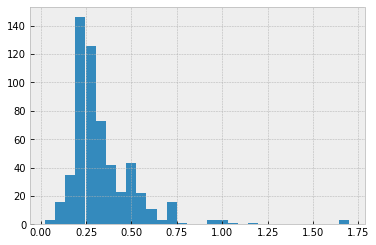

In [18]:
rates = []
for util_nm, util_id in library.utilities():
    ec = elec_cost.ElecCostCalc(util_id)
    if ec.utility.Type==2:
        continue
    rate = ec.monthly_cost(500., 1.7)/500.
    rates.append(rate)
    if rate > 0.8:
        print('{}: ${:.2f}/kWh'.format(util_nm, rate))
hist(rates, bins=30);

In [19]:
dfc = library.df_city.copy()
dfc['elec_count'] = [len(ut) for ut in dfc.ElecUtilities]
dfc.query('elec_count > 3')[['Name', 'ElecUtilities', 'elec_count']]

,Name,ElecUtilities,elec_count
ID,,,
1,Anchorage,"[(Anchorage ML&P - Residential, 2), (Anchorage...",6
11,Auke Bay,"[(AEL&P - Residential, 11), (AEL&P - Residenti...",6
15,Delta Junction,"[(Golden Valley Electric - Residential, 3), (G...",5
19,Cantwell,"[(Golden Valley Electric - Residential, 3), (G...",5
32,Clear,"[(Golden Valley Electric - Residential, 3), (G...",5
182,Healy,"[(Golden Valley Electric - Residential, 3), (G...",5
200,"Juneau, Airport","[(AEL&P - Residential, 11), (AEL&P - Residenti...",6
202,Wrangell,"[(Wrangell, City of - Residential, 128), (Wran...",6
292,"Juneau, City of","[(AEL&P - Residential, 11), (AEL&P - Residenti...",6


In [20]:
dfc.loc[301].ElecUtilities

[('AEL&P - Residential', 11),
 ('AEL&P - Residential Demand', 659),
 ('AEL&P - Residential Heat Pump', 663),
 ('AEL&P - Sm Commercial', 289),
 ('AEL&P - Lg Commercial', 476),
 ('AEL&P -  Sm Commercial Demand', 660)]

In [21]:
df_city = library.df_city
df_util = library.df_util
for ix, cty in df_city.iterrows():
    util_ids = [id for nm, id in cty.ElecUtilities]
    pces = df_util.loc[util_ids].PCE
    pce_vals = pces[pces > 0.0]
    pce_max = pces.max()
    if pce_max > 0:
        print(cty.Name, pces.values, pce_max, util_ids)

Adak [0.47 0.47] 0.47 [677, 678]
Akutan [0.77 0.77 0.77] 0.77 [9, 288, 475]
Allakaket [0.5 0.5 0.5] 0.5 [249, 291, 478]
Angoon [0.28 0.28 0.28] 0.28 [283, 393, 580]
Aniak [0.3 0.3 0.3] 0.3 [17, 295, 482]
Arctic Village [0.78 0.78 0.78] 0.78 [18, 296, 483]
Atka [0.23 0.23 0.23] 0.23 [16, 294, 481]
Bethel [0.11 0.11 0.11] 0.11 [23, 350, 537]
Bettles [0.36 0.36 0.36] 0.36 [250, 351, 538]
Central [0.31 0.31 0.31] 0.31 [33, 354, 541]
Chalkyitsik [0.33 0.33 0.33] 0.33 [277, 355, 542]
Chignik [0.24 0.24 0.24] 0.24 [31, 358, 545]
Chitina [0.33 0.33 0.33] 0.33 [32, 360, 547]
Circle [0.31 0.31 0.31] 0.31 [33, 354, 541]
Coffman Cove [0.03 0.03 0.03] 0.03 [252, 363, 550]
Cold Bay [0.45 0.45 0.45] 0.45 [47, 378, 565]
Cordova [0.08 0.08 0.08] 0.08 [37, 366, 553]
Atqasuk - Com [0.08 0.08 0.08] 0.08 [88, 427, 614]
Kaktovik - Res [0.08 0.08 0.08] 0.08 [88, 427, 614]
Nuiqsut [0.08  nan  nan] 0.08 [88, 673, 674]
Point Hope Res [0.08 0.08 0.08] 0.08 [88, 427, 614]
Point Lay [0.08 0.08 0.08] 0.08 [88, 427,

In [59]:
choices = df_city.Name.values
df_city.index.min()

1

In [61]:
# Phonetic matching of a city name to a list of cities
# This takes about 11 ms to do:  x 250 cities
cty = 'anakt'
process.extract(cty, choices)

[('Anaktuvuk Pass - C', 90),
 ('Anaktuvuk Pass Res', 90),
 ('Aniak', 80),
 ('Kongiganak', 80),
 ('Adak', 67)]

In [62]:
df_cty_cen = pd.read_csv('data/aris_city_to_census_lookups.csv')
df_cty_cen.head()

,ARIS_cities,census_city,census_area,ancsa_region,railbelt,Hub
0,Akutan,Akutan city,Aleutians East Borough,Aleut,Affordable Energy Strategy Area,0
1,Cold Bay,Cold Bay city,Aleutians East Borough,Aleut,Affordable Energy Strategy Area,0
2,False Pass,False Pass city,Aleutians East Borough,Aleut,Affordable Energy Strategy Area,0
3,King Cove,King Cove city,Aleutians East Borough,Aleut,Affordable Energy Strategy Area,0
4,Nelson Lagoon,Nelson Lagoon CDP,Aleutians East Borough,Aleut,Affordable Energy Strategy Area,0


In [75]:
aris_cities = df_cty_cen.ARIS_cities.values
ratios = []
for akw_cty in choices:
    mtch_cty, ratio = process.extractOne(akw_cty, aris_cities)
    ratios.append(ratio)
    if ratio < 90:
        print(akw_cty, mtch_cty, ratio)
    

Minchumina Huslia 60
Eyak Tenakee Springs 68
Faribanks - Chena Ridge Fairbanks 80


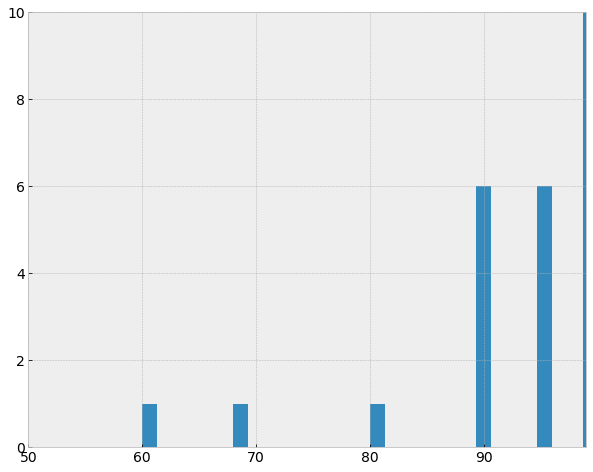

In [81]:
hist(ratios, bins=30)
ylim(0,10)
xlim(50, 99);

In [95]:
import heatpump.hp_model 
reload(heatpump.hp_model)
mod = heatpump.hp_model.HP_model()

In [105]:
mod.monthly_results()

,heat_load_mmbtu,fuel_units_no_hp,fuel_mmbtu_no_hp,fuel_$_no_hp,fuel_units_w_hp,fuel_mmbtu_w_hp,fuel_$_w_hp,elec_kwh_no_hp,elec_$_no_hp,elec_kwh_w_hp,elec_$_w_hp,fuel_chg_units,fuel_chg_mmbtu,fuel_chg_$,elec_chg_kwh,elec_chg_$,cop,co2_lbs_saved
month,,,,,,,,,,,,,,,,,,
1,15.846369,146.725639,19.807961,762.973322,146.725639,19.807961,762.973322,450,94.5,450.000000,94.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.80,0.000000
2,14.096859,130.526472,17.621074,678.737656,130.526472,17.621074,678.737656,430,90.3,430.000000,90.300000,0.000000,0.000000,0.000000,0.000000,0.000000,1.85,0.000000
3,15.259209,141.288972,19.074011,734.702656,141.288972,19.074011,734.702656,410,86.1,410.000000,86.100000,0.000000,0.000000,0.000000,0.000000,0.000000,1.90,0.000000
4,12.243798,113.368500,15.304748,589.516200,32.391000,4.372785,168.433200,390,81.9,1555.081797,579.786809,-80.977500,-10.931963,-421.083000,1165.081797,497.886809,2.20,-115.735730
5,7.923930,73.369722,9.904913,381.522556,20.962778,2.829975,109.006444,370,77.7,888.386394,279.773877,-52.406944,-7.074938,-272.516111,518.386394,202.073877,3.20,304.462844
6,4.207392,38.957333,5.259240,202.578133,11.130667,1.502640,57.879467,350,73.5,601.656339,150.745353,-27.826667,-3.756600,-144.698667,251.656339,77.245353,3.50,199.645894
7,1.439844,13.331889,1.799805,69.325822,3.809111,0.514230,19.807378,370,77.7,456.121253,95.785463,-9.522778,-1.285575,-49.518444,86.121253,18.085463,3.50,68.322358
8,2.028516,18.782556,2.535645,97.669289,5.366444,0.724470,27.905511,390,81.9,511.331435,110.099146,-13.416111,-1.811175,-69.763778,121.331435,28.199146,3.50,96.255564
9,4.443894,41.147167,5.554867,213.965267,11.756333,1.587105,61.132933,410,86.1,675.802211,184.110995,-29.390833,-3.967762,-152.832333,265.802211,98.010995,3.50,210.868203


In [97]:
mod.annual_results()

heat_load_mmbtu      115.576293
fuel_units_no_hp    1070.150861
fuel_mmbtu_no_hp     144.470366
fuel_$_no_hp        5564.784478
fuel_units_w_hp      707.826000
fuel_mmbtu_w_hp       95.556510
fuel_$_w_hp         3680.695200
elec_kwh_no_hp      4880.000000
elec_$_no_hp        1024.800000
elec_kwh_w_hp       9188.910575
elec_$_w_hp         2767.940658
fuel_chg_units      -362.324861
fuel_chg_mmbtu       -48.913856
fuel_chg_$         -1884.089278
elec_chg_kwh        4308.910575
elec_chg_$          1743.140658
cop                    2.661616
co2_lbs_saved        937.784831
dtype: float64

In [23]:
ec = elec_cost.ElecCostCalc(23)
ec.monthly_cost(800)

nan

In [24]:
library.util_from_id(23)

ID                                                             23
Name                    Bethel Utilities Corportion - Residential
Active                                                          1
Type                                                            1
IsCommercial                                                    0
ChargesRCC                                                      1
PCE                                                          0.11
CO2                                                           1.5
CustomerChg                                                     5
DemandCharge                                                  NaN
NameShort                                                  Bethel
Blocks          [(700.0, 0.3209), (nan, nan), (nan, nan), (nan...
Name: 23, dtype: object